In [1]:
#lbbVIXAnalysis-2-1
import numpy as np
import pandas as pd
pd.options.display.max_rows = 2000
pd.options.display.max_columns = None

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import datetime
import os

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',2000)
pd.set_option('display.max_row', 400)


In [2]:
os.getcwd()

'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks'

In [3]:
os.chdir('c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-cornerstoneproject\\Final')

In [4]:
df = pd.read_csv('01-bigDFrame.csv', index_col=0)

In [5]:
df.shape

(33801, 11)

In [6]:
df #wtf with the dates????? I updated several months that were missing historical data 
## and apparently the date format was changed to yyyy/mm/dd only on the futures year files
## 2018 and later.. oh yeah.. and instead of / they use - to separate the parts

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
0,10/21/2004,F (Jan 05),168.100,168.900,168.000,168.500,167.000,167.000,13,0,13
1,10/22/2004,F (Jan 05),166.700,170.000,166.300,170.000,169.400,2.400,74,0,87
2,10/25/2004,F (Jan 05),171.600,171.600,170.300,171.200,171.900,2.500,63,0,147
3,10/26/2004,F (Jan 05),179.200,179.200,169.900,170.000,168.500,-3.400,13,0,158
4,10/27/2004,F (Jan 05),168.500,170.300,168.100,168.100,167.600,-0.900,60,0,177
...,...,...,...,...,...,...,...,...,...,...,...
33796,2020-08-17,Z (Dec 2020),28.060,28.100,27.310,27.600,27.375,-0.925,7541,0,18656
33797,2020-08-18,Z (Dec 2020),27.400,27.750,27.200,27.420,27.475,0.100,6174,0,19197
33798,2020-08-19,Z (Dec 2020),27.400,28.000,27.350,27.920,27.900,0.425,6049,0,20106
33799,2020-08-20,Z (Dec 2020),27.920,28.520,27.650,27.800,27.825,-0.075,6803,0,20760


In [7]:
df.dtypes

Trade Date        object
Futures           object
Open             float64
High             float64
Low              float64
Close            float64
Settle           float64
Change           float64
Total Volume       int64
EFP                int64
Open Interest      int64
dtype: object

In [8]:
df.head()

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
0,10/21/2004,F (Jan 05),168.100,168.900,168.000,168.500,167.000,167.000,13,0,13
1,10/22/2004,F (Jan 05),166.700,170.000,166.300,170.000,169.400,2.400,74,0,87
2,10/25/2004,F (Jan 05),171.600,171.600,170.300,171.200,171.900,2.500,63,0,147
3,10/26/2004,F (Jan 05),179.200,179.200,169.900,170.000,168.500,-3.400,13,0,158
4,10/27/2004,F (Jan 05),168.500,170.300,168.100,168.100,167.600,-0.900,60,0,177


In [9]:
df.loc[(df['Trade Date']=='06/19/2020')] 
# notice how this doesn't produce results???

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest


In [10]:
df.loc[(df['Trade Date'] == '2020/06/19')]
# notice how this doesn't produce results either

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest


In [11]:
df.loc[(df['Trade Date'] == '2020-08-10')]
# this sort of looks like the above example but it isn't use - instead of /

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
2568,2020-08-10,F (Jan 2021),28.400,28.500,27.900,28.090,28.075,-0.350,865,0,8101
5722,2020-08-10,G (Feb 2021),27.900,28.050,27.520,27.750,27.725,-0.300,460,0,3201
8228,2020-08-10,H (Mar 2021),27.600,27.700,27.400,27.460,27.450,-0.325,46,0,502
10732,2020-08-10,J (Apr 2021),0.000,26.050,28.900,0.000,27.475,0.625,0,0,2
22650,2020-08-10,Q (Aug 2020),24.600,24.800,23.550,23.850,23.775,-0.850,61606,0,84066
25210,2020-08-10,U (Sep 2020),27.810,28.010,27.000,27.100,27.125,-0.700,47399,0,120904
27875,2020-08-10,V (Oct 2020),30.600,30.650,29.900,30.020,30.025,-0.500,10455,0,36556
31186,2020-08-10,X (Nov 2020),29.000,29.070,28.430,28.600,28.575,-0.400,3356,0,26287
33791,2020-08-10,Z (Dec 2020),27.920,28.080,27.450,27.640,27.625,-0.350,1608,0,15197


In [12]:
## FIX THE DATE FORMAT , ya think?

In [13]:
df.dtypes


Trade Date        object
Futures           object
Open             float64
High             float64
Low              float64
Close            float64
Settle           float64
Change           float64
Total Volume       int64
EFP                int64
Open Interest      int64
dtype: object

In [14]:
df['Trade Date'] = pd.to_datetime(df['Trade Date'])

In [15]:
df.loc[(df['Trade Date'])== '2020-08-11']

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
2569,2020-08-11,F (Jan 2021),28.150,28.670,27.520,28.450,28.625,0.550,3382,0,8820
5723,2020-08-11,G (Feb 2021),27.770,28.240,27.150,28.040,28.225,0.500,1063,0,3350
8229,2020-08-11,H (Mar 2021),27.000,28.000,26.950,27.950,27.975,0.525,146,0,553
10733,2020-08-11,J (Apr 2021),0.000,27.250,27.700,0.000,27.000,-0.475,0,0,2
22651,2020-08-11,Q (Aug 2020),23.810,25.400,22.650,24.680,24.925,1.150,81213,88,71807
25211,2020-08-11,U (Sep 2020),27.200,28.350,26.190,27.900,28.175,1.050,63303,207,129427
27876,2020-08-11,V (Oct 2020),30.050,31.070,29.200,30.710,30.975,0.950,14546,0,35763
31187,2020-08-11,X (Nov 2020),28.600,29.350,27.850,29.020,29.275,0.700,7813,0,26163
33792,2020-08-11,Z (Dec 2020),27.650,28.330,27.050,28.050,28.225,0.600,4393,0,15905


In [16]:
df.head(2000)

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
0,2004-10-21,F (Jan 05),168.100,168.900,168.000,168.500,167.000,167.000,13,0,13
1,2004-10-22,F (Jan 05),166.700,170.000,166.300,170.000,169.400,2.400,74,0,87
2,2004-10-25,F (Jan 05),171.600,171.600,170.300,171.200,171.900,2.500,63,0,147
3,2004-10-26,F (Jan 05),179.200,179.200,169.900,170.000,168.500,-3.400,13,0,158
4,2004-10-27,F (Jan 05),168.500,170.300,168.100,168.100,167.600,-0.900,60,0,177
...,...,...,...,...,...,...,...,...,...,...,...
1995,2017-08-01,F (Jan 2018),15.040,15.050,14.800,14.820,14.825,-0.200,5120,0,26674
1996,2017-08-02,F (Jan 2018),14.800,15.020,14.690,14.970,14.975,0.150,5004,0,27369
1997,2017-08-03,F (Jan 2018),15.000,15.200,14.980,15.110,15.125,0.150,2758,0,27514
1998,2017-08-04,F (Jan 2018),15.120,15.300,15.050,15.270,15.250,0.125,4230,0,28703


In [17]:
# find duplicate rows except for first occurance
dfDuplicateRows = df[df.duplicated()]
dfDuplicateRows.shape

(0, 11)

In [18]:
## no duplicates this time, so we don't need to drop.. df = df.drop_duplicates()

In [19]:
df.isnull().sum()

Trade Date       0
Futures          0
Open             4
High             4
Low              4
Close            4
Settle           0
Change           5
Total Volume     0
EFP              0
Open Interest    0
dtype: int64

In [20]:
# review rows that have na values
dfDropRows = pd.DataFrame()

In [21]:
dfDropRows = df[df.isnull().any(axis=1)]
dfDropRows

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
36,2004-12-13,F (Jan 05),nan,nan,nan,nan,138.700,-2.900,105,0,1510
2578,2004-06-18,G (Feb 05),0.000,0.000,0.000,0.000,0.000,nan,0,0,0
2701,2004-12-13,G (Feb 05),nan,nan,nan,nan,151.100,-2.500,127,0,6038
5732,2005-01-24,H (Mar 05),145.900,146.100,144.500,145.500,144.500,nan,94,0,63
10839,2004-12-13,K (May 05),nan,nan,nan,nan,160.600,-4.600,152,0,549
10948,2005-08-19,K (May 06),0.000,0.000,0.000,0.000,0.000,nan,0,0,0
19582,2004-11-19,Q (Aug 05),0.000,0.000,0.000,0.000,0.000,nan,0,0,0
19597,2004-12-13,Q (Aug 05),nan,nan,nan,nan,169.300,-2.500,78,0,265
25220,2004-08-20,V (Oct 04),0.000,0.000,0.000,0.000,0.000,nan,0,0,0


In [22]:
df = df.dropna()

In [23]:
## After reviewing these null items, none make any sense - as the dates preceed the 
## start date of the futures listed, therefore I am deleting these rows.

In [24]:
df.isnull().sum()

Trade Date       0
Futures          0
Open             0
High             0
Low              0
Close            0
Settle           0
Change           0
Total Volume     0
EFP              0
Open Interest    0
dtype: int64

In [25]:
#if you need to view one row, use the [located by label] instead of iloc[locate by index location]
df.loc[19452] ##Notice how we have not only a date, but also a timestamp

Trade Date       2020-06-10 00:00:00
Futures                 N (Jul 2020)
Open                          29.350
High                          29.770
Low                           27.850
Close                         29.000
Settle                        29.025
Change                        -0.550
Total Volume                   67537
EFP                               80
Open Interest                 121047
Name: 19452, dtype: object

In [26]:
# if we wanted to change the value in row 2539 column Change to 0 instead of nan
#df.loc[2539, 'Change'] = 0.00
#df.loc[2539]

In [27]:
# to fill all NaN values with 0 for the whole dataframe
#df.fillna(0, inplace=True)
 #no more rows with NaN's

In [28]:
## Segment those years of data from 2004, 2005, and 2006, Jan - July from the database
## I decide not to do this until later..but I left this in in case you want to segment your df differently than mine
dfOldYears = pd.DataFrame()

In [29]:
cond = df['Trade Date'] < '6-19-2006'

In [30]:
rowsToDrop = df.loc[cond, :]

In [31]:
dfOldYears = dfOldYears.append(rowsToDrop, ignore_index=True)
dfOldYears.tail(100)

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
2133,2006-03-28,X (Nov 06),149.200,150.000,149.200,149.500,149.600,-0.700,12,0,171
2134,2006-03-29,X (Nov 06),148.600,149.300,148.600,149.300,149.100,-0.500,7,0,163
2135,2006-03-30,X (Nov 06),148.400,148.500,147.500,148.200,148.600,-0.500,23,0,167
2136,2006-03-31,X (Nov 06),147.800,148.000,147.500,147.500,147.400,-1.200,27,0,181
2137,2006-04-03,X (Nov 06),146.900,147.600,146.900,147.600,147.200,-0.200,38,0,205
2138,2006-04-04,X (Nov 06),147.000,147.000,147.000,147.000,146.400,-0.800,5,0,210
2139,2006-04-05,X (Nov 06),147.000,147.000,146.500,146.500,146.200,-0.200,11,0,245
2140,2006-04-06,X (Nov 06),147.000,147.000,146.500,146.500,146.000,-0.200,15,0,255
2141,2006-04-07,X (Nov 06),146.000,146.000,146.000,146.000,146.000,0.000,5,0,255
2142,2006-04-10,X (Nov 06),146.500,146.900,145.500,145.500,145.600,-0.400,44,0,240


In [32]:
df.head(100) #I decide to keep the oldYears for now

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
0,2004-10-21,F (Jan 05),168.100,168.900,168.000,168.500,167.000,167.000,13,0,13
1,2004-10-22,F (Jan 05),166.700,170.000,166.300,170.000,169.400,2.400,74,0,87
2,2004-10-25,F (Jan 05),171.600,171.600,170.300,171.200,171.900,2.500,63,0,147
3,2004-10-26,F (Jan 05),179.200,179.200,169.900,170.000,168.500,-3.400,13,0,158
4,2004-10-27,F (Jan 05),168.500,170.300,168.100,168.100,167.600,-0.900,60,0,177
5,2004-10-28,F (Jan 05),168.200,168.200,166.700,166.700,166.500,-1.100,7,0,178
6,2004-10-29,F (Jan 05),166.500,166.500,165.000,165.000,165.700,-0.800,12,0,180
7,2004-11-01,F (Jan 05),166.400,167.300,165.800,166.000,166.300,0.600,19,0,175
8,2004-11-02,F (Jan 05),163.300,163.300,159.800,162.000,162.800,-3.500,301,0,401
9,2004-11-03,F (Jan 05),158.900,160.300,157.000,157.800,157.900,-4.900,230,0,579


In [33]:
#df = df.drop(rowsToDrop.index, inplace=True) #if you want to remove data before 6/2006 then uncomment this line
#df.loc[cond, :] #Dates before June 2006 have been moved to mini df

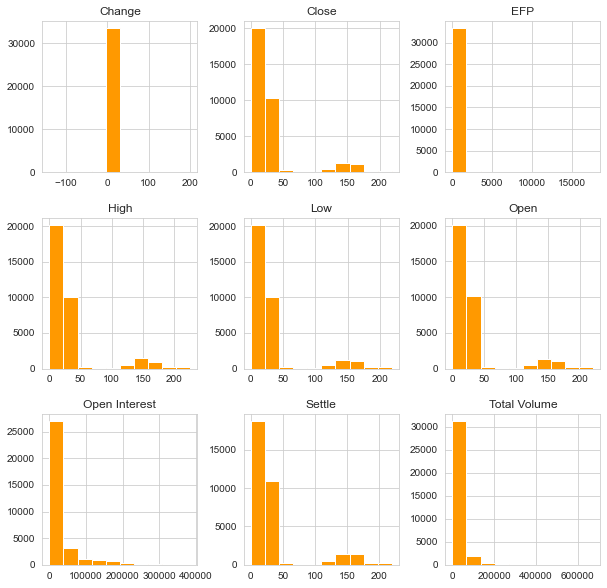

In [34]:
df.hist(
    figsize=(10,10),
    color='#ff9900')
# but we don't really need the labels rotated..
plt.show()

In [35]:
cond2 = df['High'] > 90
df.loc[cond2,:]
# All of these are from 2006 and earlier, I decide to divide by 10

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
0,2004-10-21,F (Jan 05),168.100,168.900,168.000,168.500,167.000,167.000,13,0,13
1,2004-10-22,F (Jan 05),166.700,170.000,166.300,170.000,169.400,2.400,74,0,87
2,2004-10-25,F (Jan 05),171.600,171.600,170.300,171.200,171.900,2.500,63,0,147
3,2004-10-26,F (Jan 05),179.200,179.200,169.900,170.000,168.500,-3.400,13,0,158
4,2004-10-27,F (Jan 05),168.500,170.300,168.100,168.100,167.600,-0.900,60,0,177
...,...,...,...,...,...,...,...,...,...,...,...
31297,2006-12-13,Z (Dec 06),110.300,110.300,105.300,105.700,105.400,-6.400,729,0,11003
31298,2006-12-14,Z (Dec 06),106.700,106.800,102.000,103.400,103.700,-1.700,2096,0,8904
31299,2006-12-15,Z (Dec 06),101.600,104.500,101.000,103.500,104.400,0.700,3613,0,7990
31300,2006-12-18,Z (Dec 06),104.000,106.800,103.500,105.600,105.600,1.200,1095,0,5306


In [36]:
#df2 = df.copy()#for some reason if I try to change the values without making this copy it gives me a warning,
# but I know this works, so ignore the warnings

In [37]:
df['High'] = np.where(df.High > 99, df.High/10, df.High)
df['Open'] = np.where(df.Open > 99, df.Open/10, df.Open)
df['Close'] = np.where(df.Close > 99, df.Close/10, df.Close)
df['Low'] = np.where(df.Low > 99, df.Low/10, df.Low)
df['Settle'] = np.where(df.Settle > 99, df.Settle/10, df.Settle)

<ipython-input-37-bed9075ae3e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'] = np.where(df.High > 99, df.High/10, df.High)
<ipython-input-37-bed9075ae3e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open'] = np.where(df.Open > 99, df.Open/10, df.Open)
<ipython-input-37-bed9075ae3e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [40]:
df.loc[df['High'] > 99]

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest


In [41]:
df.describe()

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
count,33792.000,33792.000,33792.000,33792.000,33792.000,33792.000,33792.000,33792.000,33792.000
mean,19.724,20.242,19.596,19.714,20.824,0.170,14541.329,86.514,29542.268
std,8.097,8.127,7.738,8.117,6.962,5.293,33846.384,490.013,48309.830
min,0.000,0.000,0.000,0.000,0.000,-139.720,0.000,0.000,0.000
25%,16.050,16.350,15.920,16.020,16.440,-0.321,130.000,0.000,1905.000
50%,18.630,19.000,18.450,18.620,18.950,-0.050,1658.000,0.000,11951.000
75%,23.650,24.040,23.400,23.650,24.050,0.250,9176.250,0.000,32473.250
max,72.500,82.000,70.250,81.950,72.625,200.500,675499.000,17669.000,383927.000


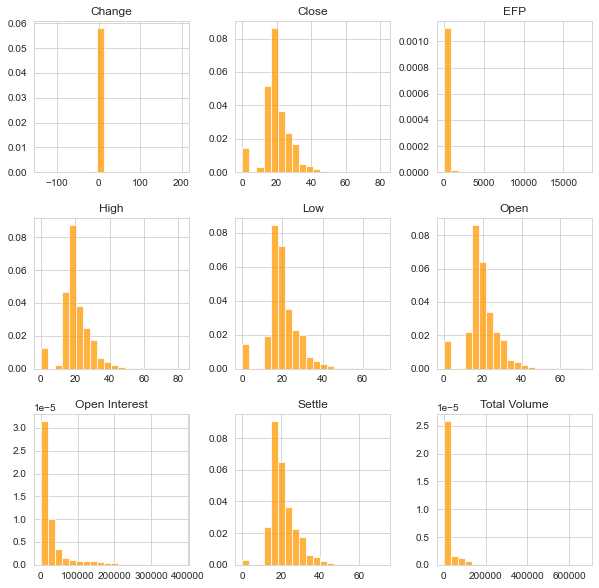

In [42]:
df.hist(bins=20, density=True, facecolor='#ff9900', alpha=0.75, figsize=(10,10))
#df.hist(
#    figsize=(10,10),
#    color='#ff9900')
# but we don't really need the labels rotated..
plt.show()

In [43]:
df.Futures.unique()

array(['F (Jan 05)', 'F (Jan 06)', 'F (Jan 07)', 'F (Jan 08)',
       'F (Jan 09)', 'F (Jan 10)', 'F (Jan 11)', 'F (Jan 12)',
       'F (Jan 13)', 'F (Jan 14)', 'F (Jan 15)', 'F (Jan 16)',
       'F (Jan 17)', 'F (Jan 2018)', 'F (Jan 2019)', 'F (Jan 2020)',
       'F (Jan 2021)', 'G (Feb 05)', 'G (Feb 06)', 'G (Feb 07)',
       'G (Feb 08)', 'G (Feb 09)', 'G (Feb 10)', 'G (Feb 11)',
       'G (Feb 12)', 'G (Feb 13)', 'G (Feb 14)', 'G (Feb 15)',
       'G (Feb 16)', 'G (Feb 17)', 'G (Feb 2018)', 'G (Feb 2019)',
       'G (Feb 2020)', 'G (Feb 2021)', 'H (Mar 05)', 'H (Mar 06)',
       'H (Mar 07)', 'H (Mar 08)', 'H (Mar 09)', 'H (Mar 10)',
       'H (Mar 11)', 'H (Mar 12)', 'H (Mar 13)', 'H (Mar 14)',
       'H (Mar 15)', 'H (Mar 16)', 'H (Mar 17)', 'H (Mar 2018)',
       'H (Mar 2019)', 'H (Mar 2020)', 'H (Mar 2021)', 'J (Apr 06)',
       'J (Apr 07)', 'J (Apr 08)', 'J (Apr 09)', 'J (Apr 10)',
       'J (Apr 11)', 'J (Apr 12)', 'J (Apr 13)', 'J (Apr 14)',
       'J (Apr 15)', 'J (Apr 16

In [44]:
df['Futures'] = df.Futures.str.replace('04','2004')
df['Futures'] = df.Futures.str.replace('05','2005')
df['Futures'] = df.Futures.str.replace('06','2006')
df['Futures'] = df.Futures.str.replace('07','2007')
df['Futures'] = df.Futures.str.replace('08','2008')
df['Futures'] = df.Futures.str.replace('09','2009')
df['Futures'] = df.Futures.str.replace('10','2010')
df['Futures'] = df.Futures.str.replace('11','2011')
df['Futures'] = df.Futures.str.replace('12','2012')
df['Futures'] = df.Futures.str.replace('13','2013')
df['Futures'] = df.Futures.str.replace('14','2014')
df['Futures'] = df.Futures.str.replace('15','2015')
df['Futures'] = df.Futures.str.replace('16','2016')
df['Futures'] = df.Futures.str.replace('17','2017')
#df['Futures'] = df.Futures.str.replace('18','2018')'''


<ipython-input-44-3f80f78529b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Futures'] = df.Futures.str.replace('04','2004')
<ipython-input-44-3f80f78529b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Futures'] = df.Futures.str.replace('05','2005')
<ipython-input-44-3f80f78529b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [45]:
df.Futures

0        F (Jan 2005)
1        F (Jan 2005)
2        F (Jan 2005)
3        F (Jan 2005)
4        F (Jan 2005)
             ...     
33796    Z (Dec 2020)
33797    Z (Dec 2020)
33798    Z (Dec 2020)
33799    Z (Dec 2020)
33800    Z (Dec 2020)
Name: Futures, Length: 33792, dtype: object

In [46]:
df.tail()

,Trade Date,Futures,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
33796,2020-08-17,Z (Dec 2020),28.060,28.100,27.310,27.600,27.375,-0.925,7541,0,18656
33797,2020-08-18,Z (Dec 2020),27.400,27.750,27.200,27.420,27.475,0.100,6174,0,19197
33798,2020-08-19,Z (Dec 2020),27.400,28.000,27.350,27.920,27.900,0.425,6049,0,20106
33799,2020-08-20,Z (Dec 2020),27.920,28.520,27.650,27.800,27.825,-0.075,6803,0,20760
33800,2020-08-21,Z (Dec 2020),27.770,28.450,27.660,28.240,28.175,0.350,5035,0,20592


In [50]:
df.to_csv('abt_Initial.csv')

In [48]:
df2 = df.copy()

In [49]:
df2.groupby(df2.Futures).count()

,Trade Date,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest
Futures,,,,,,,,,,
F (Jan 2005),61,61,61,61,61,61,61,61,61,61
F (Jan 2006),40,40,40,40,40,40,40,40,40,40
F (Jan 2007),59,59,59,59,59,59,59,59,59,59
F (Jan 2008),125,125,125,125,125,125,125,125,125,125
F (Jan 2009),192,192,192,192,192,192,192,192,192,192
F (Jan 2010),156,156,156,156,156,156,156,156,156,156
F (Jan 2011),174,174,174,174,174,174,174,174,174,174
F (Jan 2012),166,166,166,166,166,166,166,166,166,166
F (Jan 2013),193,193,193,193,193,193,193,193,193,193
